<div style="border-radius:10px; border:#3a86ff solid; padding: 15px; background-color: #3d405b; font-size:100%; text-align:left height:100rem width:50%" >

<h1 align="center"> Binary Classification of Insurance Cross Selling 💼🔍 </h1>
<h3 align="center"><font color='#d4a373'>💡 About The data Columns :</font></h3>
    
😃We're studying to predict which customers respond positively to an automobile insurance offer.
    
🥨**Gender**: Categorical variable indicating the gender of the customer.
    
🌭**Age**: Numeric variable indicating the age of the customer.
    
🥓**Driving_License**: Binary variable indicating if the customer has a driving license (1 if yes, 0 if no).
    
🚜**Region_Code**: Numeric variable indicating the region code of the customer.
    
🥡**Previously_Insured**: Binary variable indicating if the customer was previously insured (1 if yes, 0 if no).
    
🖼**Vehicle_Age**: Categorical variable indicating the age of the vehicle.
    
🕸**Vehicle_Damage**: Categorical variable indicating if the vehicle was damaged in the past.
    
**Annual_Premium**: Numeric variable indicating the annual premium amount.
    
🎡**Policy_Sales_Channel**: Numeric variable indicating the sales channel of the policy.
    
🎢**Vintage**: Numeric variable indicating the number of days the customer has been associated with the company.
    
🎞**Response**: Binary target variable indicating if the customer responded positively to the automobile insurance offer (1 if yes, 0 if no).

<div style="border-radius:10px; border:#dad7cd solid; padding: 15px; background-color: #003566; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: The objective of this competition is to predict which customers respond positively to an automobile insurance offer..

**Dataset**: The dataset for this competition (both train and test) was generated from a deep learning model trained on the Health Insurance Cross Sell Prediction Data dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

**Evaluation**: Submissions are evaluated using area under the ROC curve.

**Submission**: train.csv - the training dataset; Response is the binary target
test.csv - the test dataset; your objective is to predict the probability of Response for each row
sample_submission.csv - a sample submission file in the correct format

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score


In [3]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [8]:
# df_train=pd.read_csv("/kaggle/input/despacitoinsur/trainreduced.csv")
# df_test=pd.read_csv("/kaggle/input/despacitoinsur/testreduced.csv")
# sample_submission = pd.read_csv('/kaggle/input//playground-series-s4e7/sample_submission.csv')

df_train=pd.read_csv("./data/trainreduced.csv")
df_test=pd.read_csv("./data/testreduced.csv")


In [9]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35,0,1,1,65101.0,124,187,0
1,1,43,1,28,0,2,1,58911.0,26,288,1
2,0,25,1,14,1,0,0,38043.0,152,254,0
3,0,35,1,1,0,1,1,2630.0,156,76,0
4,0,36,1,15,1,1,0,31951.0,152,294,0


In [10]:
df_test.head()


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,20,1,47,0,0,0,2630.0,160,228
1,1,47,1,28,0,1,1,37483.0,124,123
2,1,47,1,43,0,1,1,2630.0,26,271
3,0,22,1,47,1,0,0,24502.0,152,115
4,1,51,1,19,0,1,0,34115.0,124,148


In [11]:
def NullValues(data):
    null_values = data.isnull().sum()
    duplicate_values = data.duplicated().sum()
    print(f"Null Values: \n{null_values}\n\nDuplicate Values: {duplicate_values}")

In [12]:
NullValues(df_train)

Null Values: 
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Duplicate Values: 0


In [13]:
df_train.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.413510e-01,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,6.031073e-01,5.026798e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,4.982872e-01,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,5.678559e-01,4.999928e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,2.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00



---

# **📉Exploratory Data Analysis📊**

---

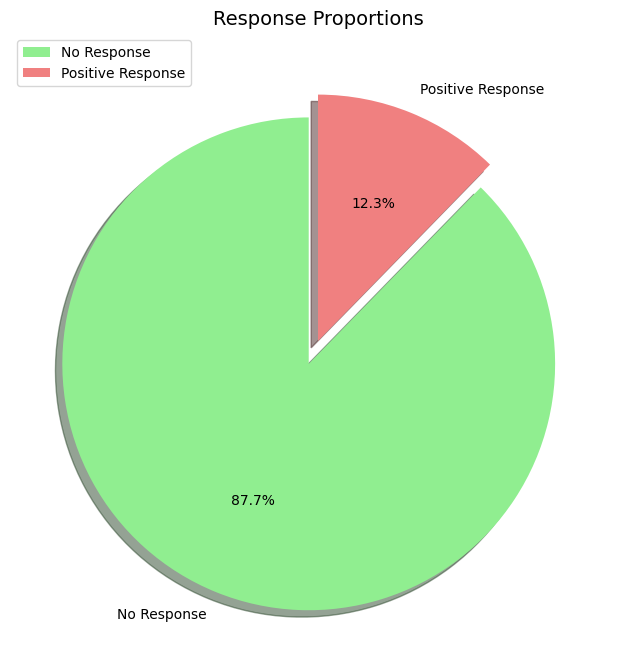

In [14]:
if 'Response' in df_train.columns and df_train['Response'].nunique() > 1:
    response_counts = df_train['Response'].value_counts()
    
    plt.figure(figsize=(8, 8))
    explode = (0.1, 0)  

    plt.pie(response_counts, labels=['No Response', 'Positive Response'], autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral'], startangle=90, shadow=True, explode=explode)
    
    plt.title('Response Proportions', fontsize=14)  
    plt.legend(loc="best") 
    plt.show()
else:
    print("The 'Response' column is missing or does not have enough categories to plot.")

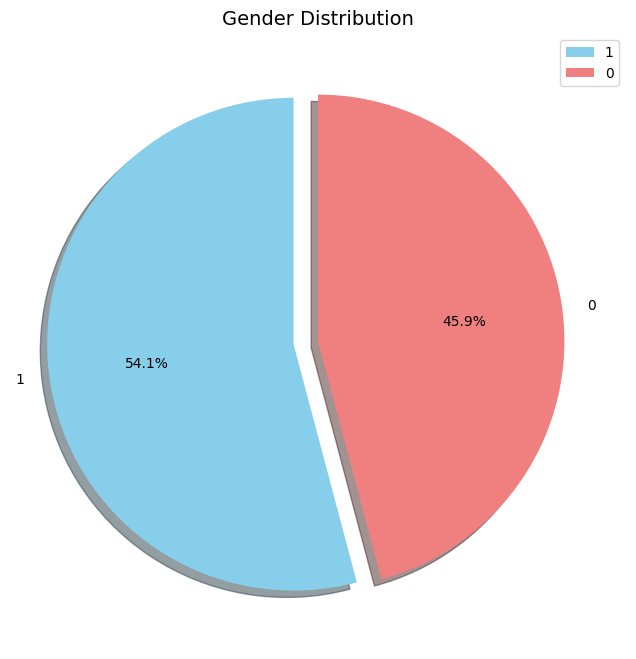

In [15]:
if 'Gender' in df_train.columns and df_train['Gender'].nunique() > 1:
	gender_counts = df_train['Gender'].value_counts()
	
	plt.figure(figsize=(8, 8))
	explode = (0.1, 0)  
	plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
			colors=['skyblue', 'lightcoral'], startangle=90, shadow=True, explode=explode)
	
	plt.title('Gender Distribution', fontsize=14)  
	plt.legend(loc='best')  
	plt.show()
else:
	print("The 'Gender' column is missing or does not have enough categories to plot.")

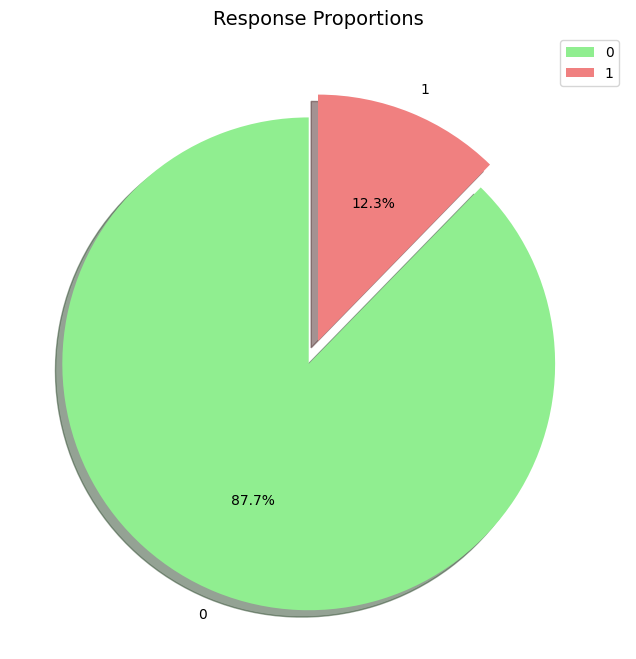

In [16]:
if 'Response' in df_train.columns and df_train['Response'].nunique() > 1:
    response_counts = df_train['Response'].value_counts()
    
    plt.figure(figsize=(8, 8))  
    explode = (0.1, 0)  
    
    plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral'], startangle=90, shadow=True, explode=explode)
    
    plt.title('Response Proportions', fontsize=14)
    plt.legend(loc="best")  
    plt.show()
else:
    print("The 'Response' column is missing or does not have enough categories to plot.")

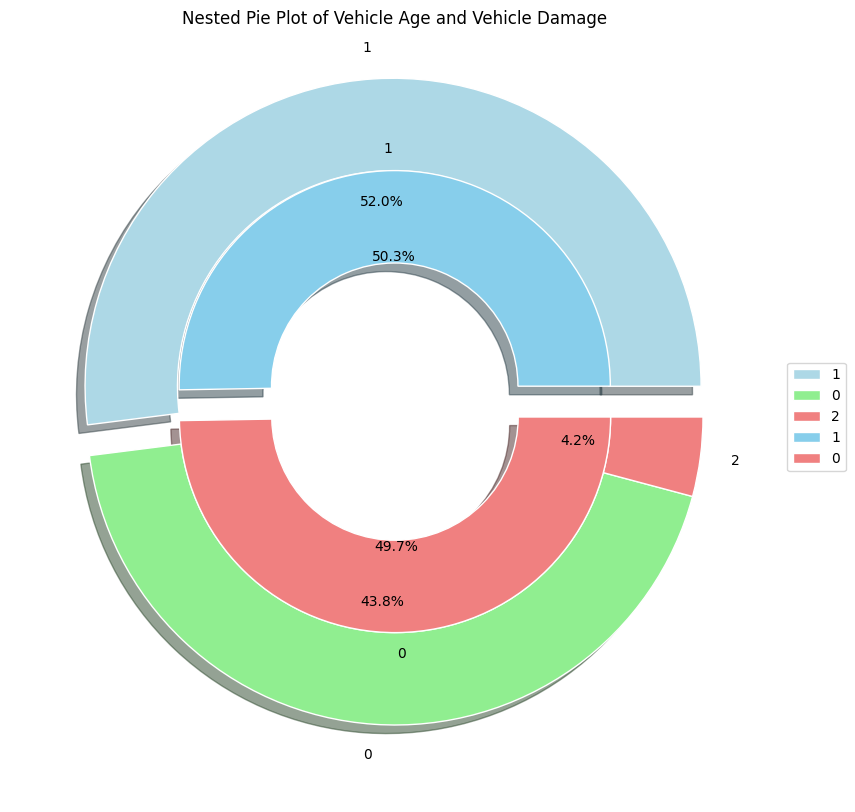

In [17]:
if all(column in df_train.columns and df_train[column].nunique() > 1 for column in ['Vehicle_Age', 'Vehicle_Damage']):
    vehicle_age_counts = df_train['Vehicle_Age'].value_counts()
    vehicle_damage_counts = df_train['Vehicle_Damage'].value_counts()
    
    fig, ax = plt.subplots(figsize=(10, 10))  
    
    explode_outer = (0.1, 0, 0)  
    ax.pie(vehicle_age_counts, labels=vehicle_age_counts.index, autopct='%1.1f%%',
           colors=['lightblue', 'lightgreen', 'lightcoral'], radius=1, shadow=True, explode=explode_outer,
           wedgeprops=dict(width=0.3, edgecolor='w'))
    
    explode_inner = (0.1, 0)
    ax.pie(vehicle_damage_counts, labels=vehicle_damage_counts.index, autopct='%1.1f%%',
           colors=['skyblue', 'lightcoral'], radius=0.7, shadow=True, explode=explode_inner,
           wedgeprops=dict(width=0.3, edgecolor='w'))
    
    ax.set(aspect="equal", title='Nested Pie Plot of Vehicle Age and Vehicle Damage')
    plt.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))  
    plt.show()
else:
    print("One or both of the 'Vehicle_Age' or 'Vehicle_Damage' columns are missing or do not have enough categories to plot.")

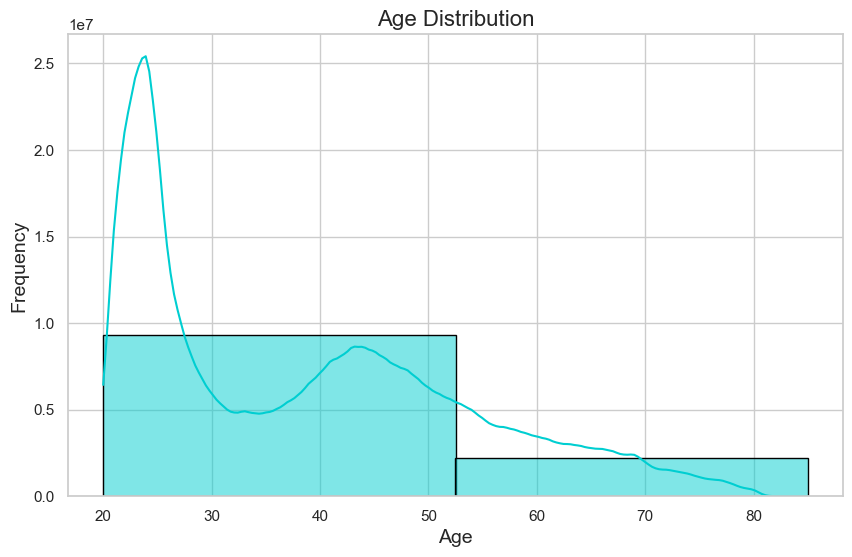

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_size = int((df_train['Age'].max() - df_train['Age'].min()) / 30)

sns.histplot(df_train['Age'], bins=bin_size, kde=True, edgecolor='black', color='darkturquoise')

plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

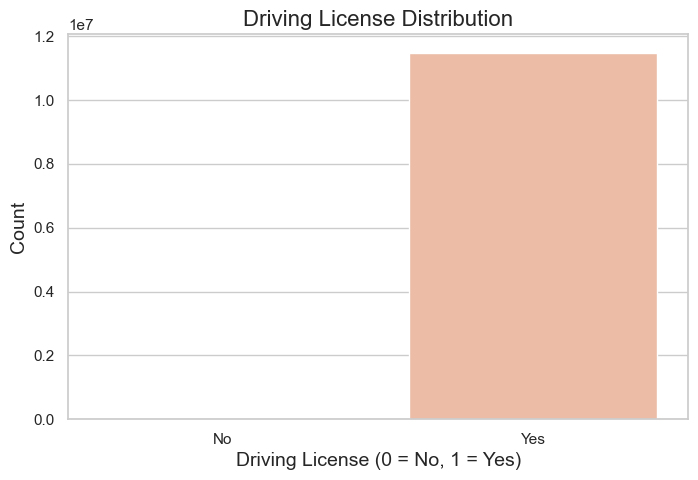

In [19]:
plt.figure(figsize=(8, 5))  
sns.countplot(x='Driving_License', data=df_train, palette='coolwarm')
plt.title('Driving License Distribution', fontsize=16)  
plt.xlabel('Driving License (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)  
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()

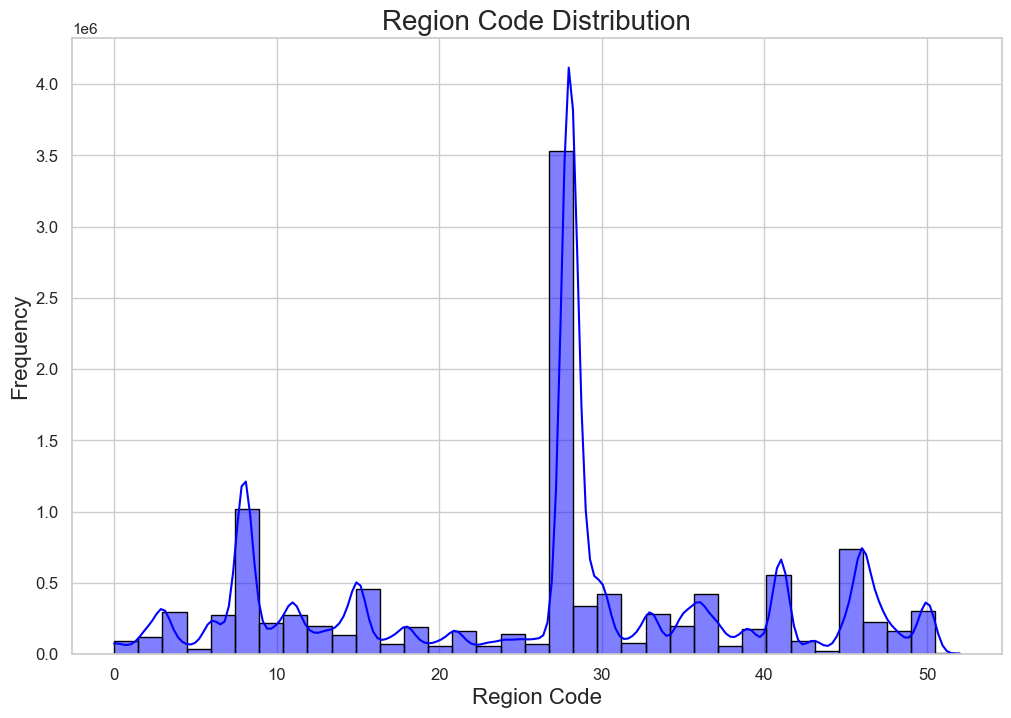

In [20]:
plt.figure(figsize=(12, 8))  
sns.histplot(df_train['Region_Code'], bins=35, kde=True, color='blue', edgecolor='black')
plt.title('Region Code Distribution', fontsize=20)  
plt.xlabel('Region Code', fontsize=16)  
plt.ylabel('Frequency', fontsize=16)  
plt.xticks(fontsize=12)   
plt.yticks(fontsize=12)   
plt.grid(True)
plt.show()

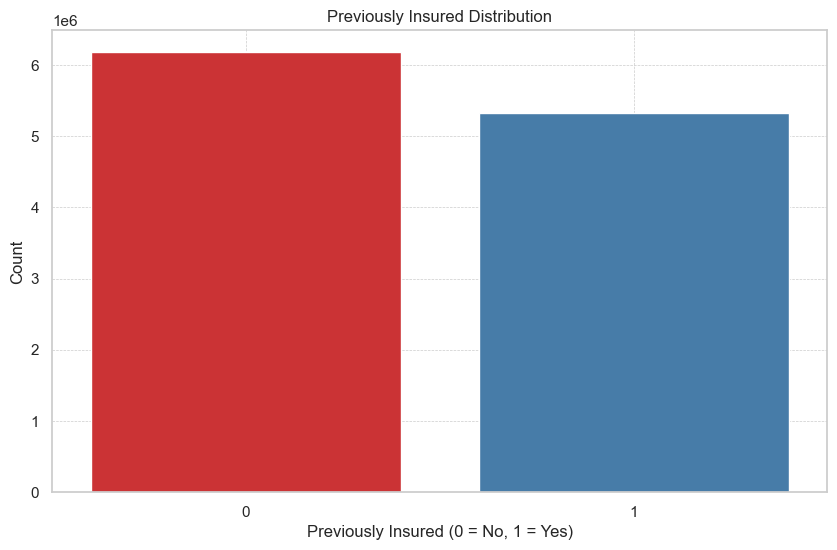

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Previously_Insured', data=df_train, palette='Set1')
plt.title('Previously Insured Distribution')
plt.xlabel('Previously Insured (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


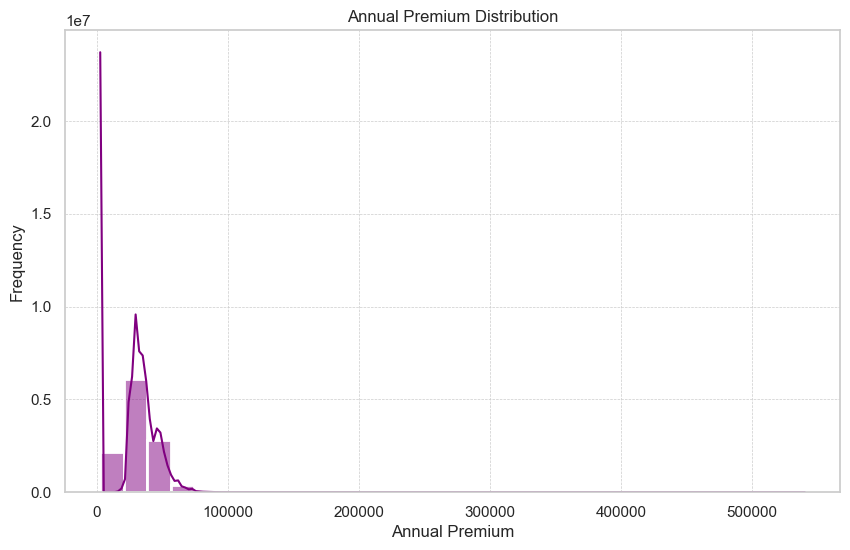

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Annual_Premium'], bins=30, kde=True, color='purple', linewidth=2)
plt.title('Annual Premium Distribution')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


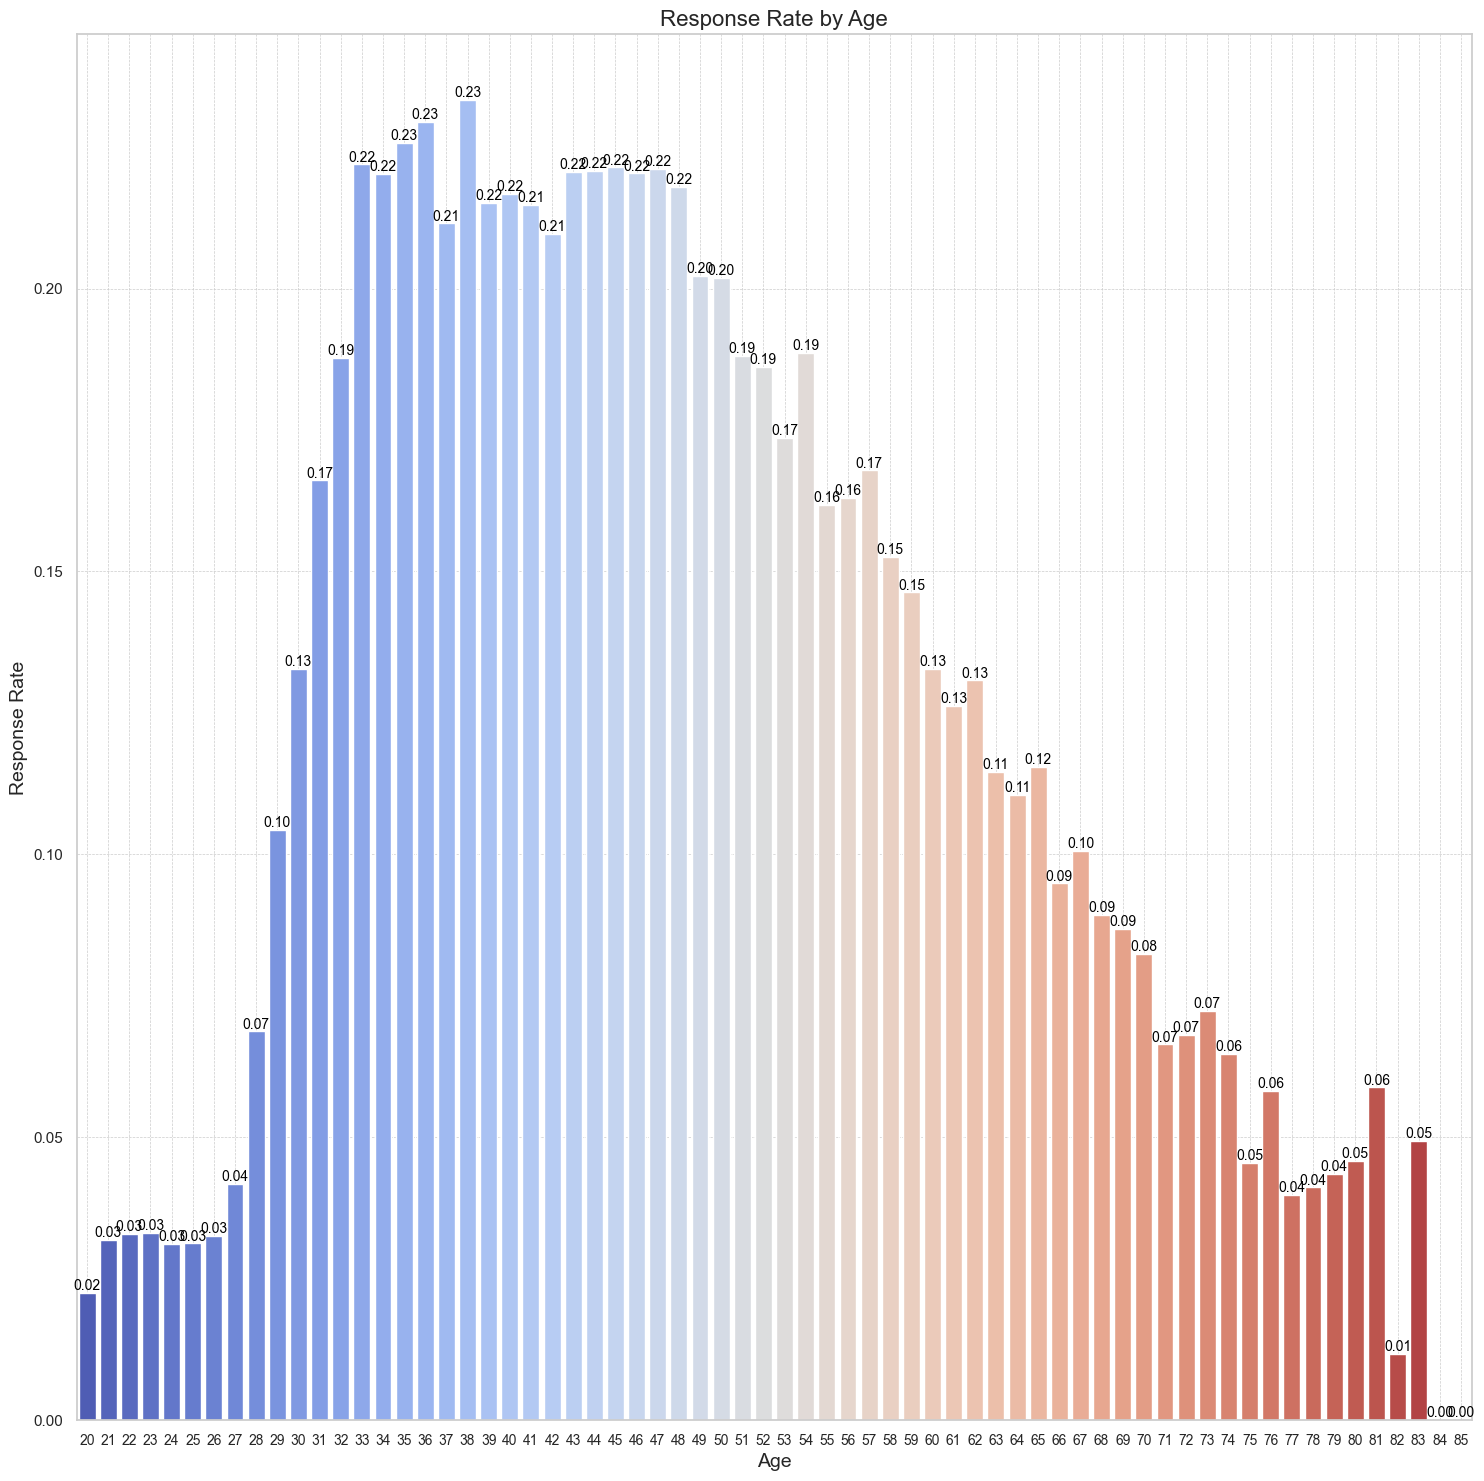

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(18, 18))
age_response = df_train.groupby('Age')['Response'].mean().reset_index()
sns.barplot(x='Age', y='Response', data=age_response, palette='coolwarm')
plt.title('Response Rate by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Response Rate', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
for index, row in age_response.iterrows():
    plt.text(row.name, row.Response, f'{row.Response:.2f}', color='black', ha="center", va="bottom", fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


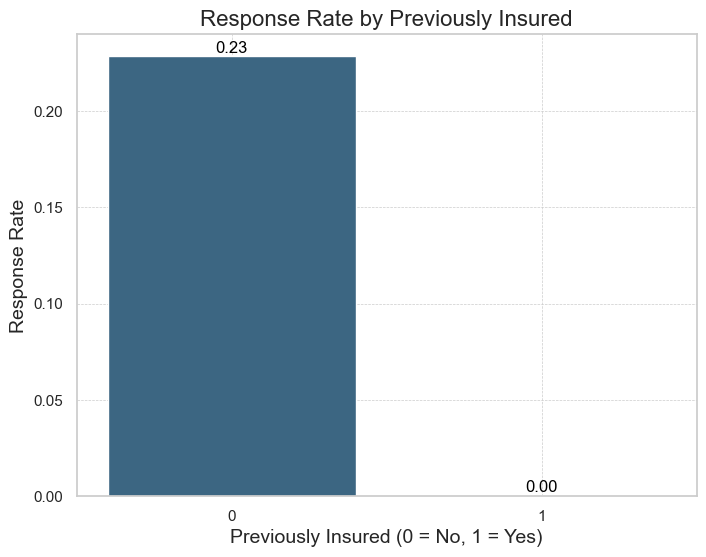

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
insured_response = df_train.groupby('Previously_Insured')['Response'].mean().reset_index()
sns.barplot(x='Previously_Insured', y='Response', data=insured_response, palette='viridis')
plt.title('Response Rate by Previously Insured', fontsize=16)
plt.xlabel('Previously Insured (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Response Rate', fontsize=14)
for index, row in insured_response.iterrows():
    plt.text(row.name, row.Response, f'{row.Response:.2f}', color='black', ha="center", va="bottom", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


MemoryError: Unable to allocate 614. MiB for an array with shape (80533586,) and data type int64

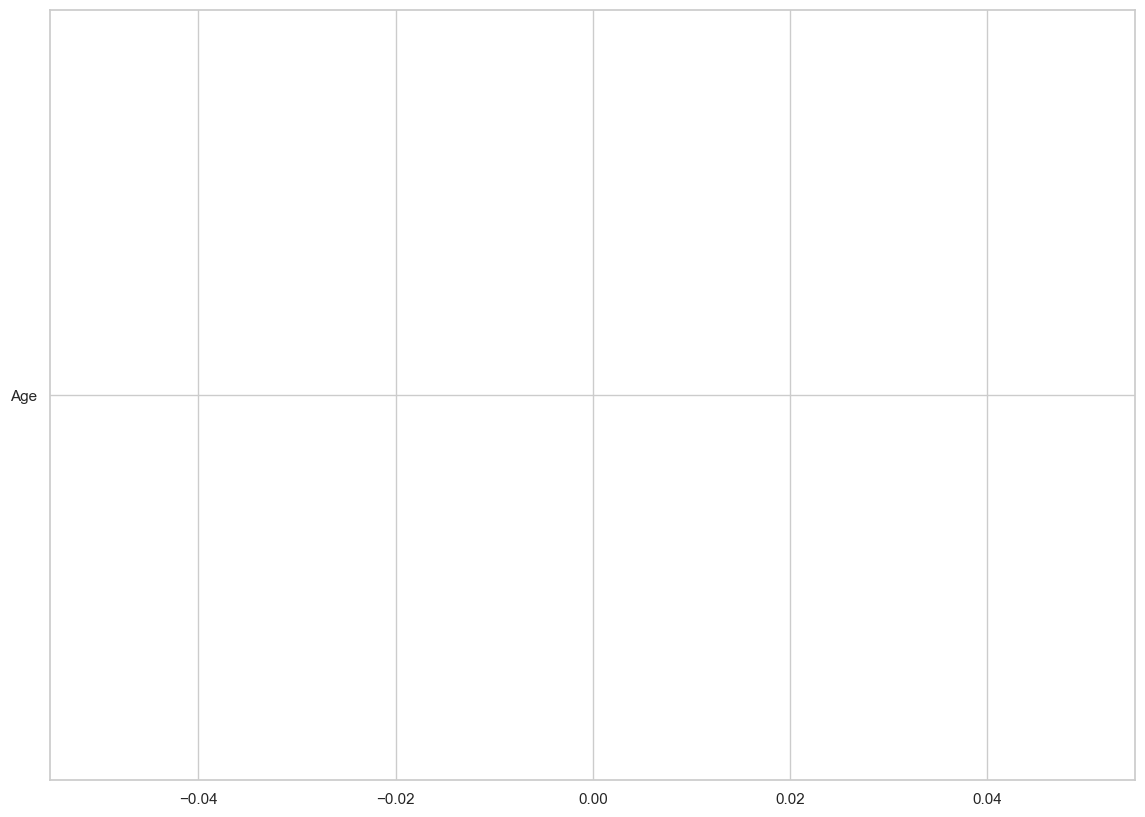

In [25]:
sns.set_style("whitegrid")
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 
                  'Policy_Sales_Channel', 'Vintage', 'Response']
plt.figure(figsize=(14, 10))
sns.violinplot(data=df_train[numerical_cols], orient='h', palette='Set2', cut=0)
plt.title('Distribution of Numerical Variables', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.show()


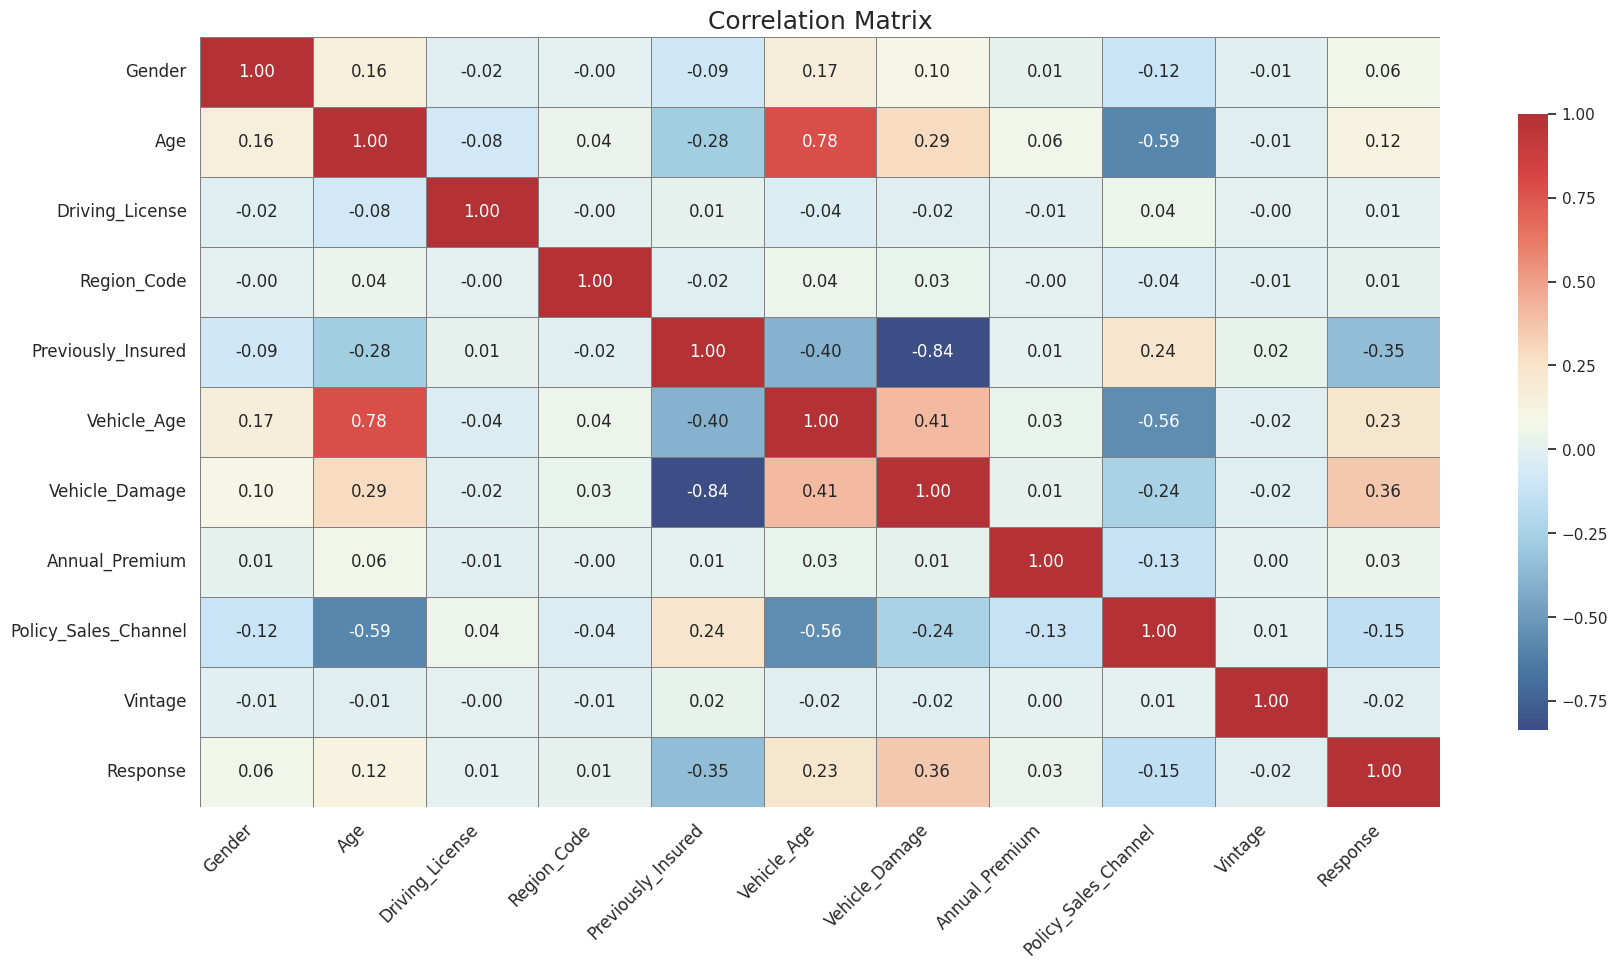

In [28]:
from matplotlib.colors import LinearSegmentedColormap

custom_palette = ["#3C4E85", "#4979A3", "#75A2C1", "#9FCCE1", "#CDE6F8", "#F5F8E8", "#F8E2C8", "#F1AF96", "#E87763", "#D74543", "#B43135"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette, N=256)
correlation_matrix = df_train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()


In [29]:
correlation_matrix

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,0.157663,-0.018702,-0.000106,-0.087614,0.167354,0.096989,0.010652,-0.116058,-0.009535,0.055212
Age,0.157663,1.000000,-0.078519,0.037041,-0.276248,0.779041,0.287952,0.056327,-0.591443,-0.013293,0.122134
Driving_License,-0.018702,-0.078519,1.000000,-0.001329,0.013733,-0.036511,-0.015563,-0.007300,0.042941,-0.000697,0.009197
Region_Code,-0.000106,0.037041,-0.001329,1.000000,-0.022367,0.039242,0.026468,-0.001741,-0.037606,-0.005537,0.012816
Previously_Insured,-0.087614,-0.276248,0.013733,-0.022367,1.000000,-0.396752,-0.836214,0.007665,0.236838,0.019431,-0.345930
Vehicle_Age,0.167354,0.779041,-0.036511,0.039242,-0.396752,1.000000,0.410515,0.028007,-0.558992,-0.018022,0.231029
Vehicle_Damage,0.096989,0.287952,-0.015563,0.026468,-0.836214,0.410515,1.000000,0.012728,-0.241036,-0.019393,0.359780
Annual_Premium,0.010652,0.056327,-0.007300,-0.001741,0.007665,0.028007,0.012728,1.000000,-0.128559,0.003284,0.032261
Policy_Sales_Channel,-0.116058,-0.591443,0.042941,-0.037606,0.236838,-0.558992,-0.241036,-0.128559,1.000000,0.008999,-0.152733
Vintage,-0.009535,-0.013293,-0.000697,-0.005537,0.019431,-0.018022,-0.019393,0.003284,0.008999,1.000000,-0.015177


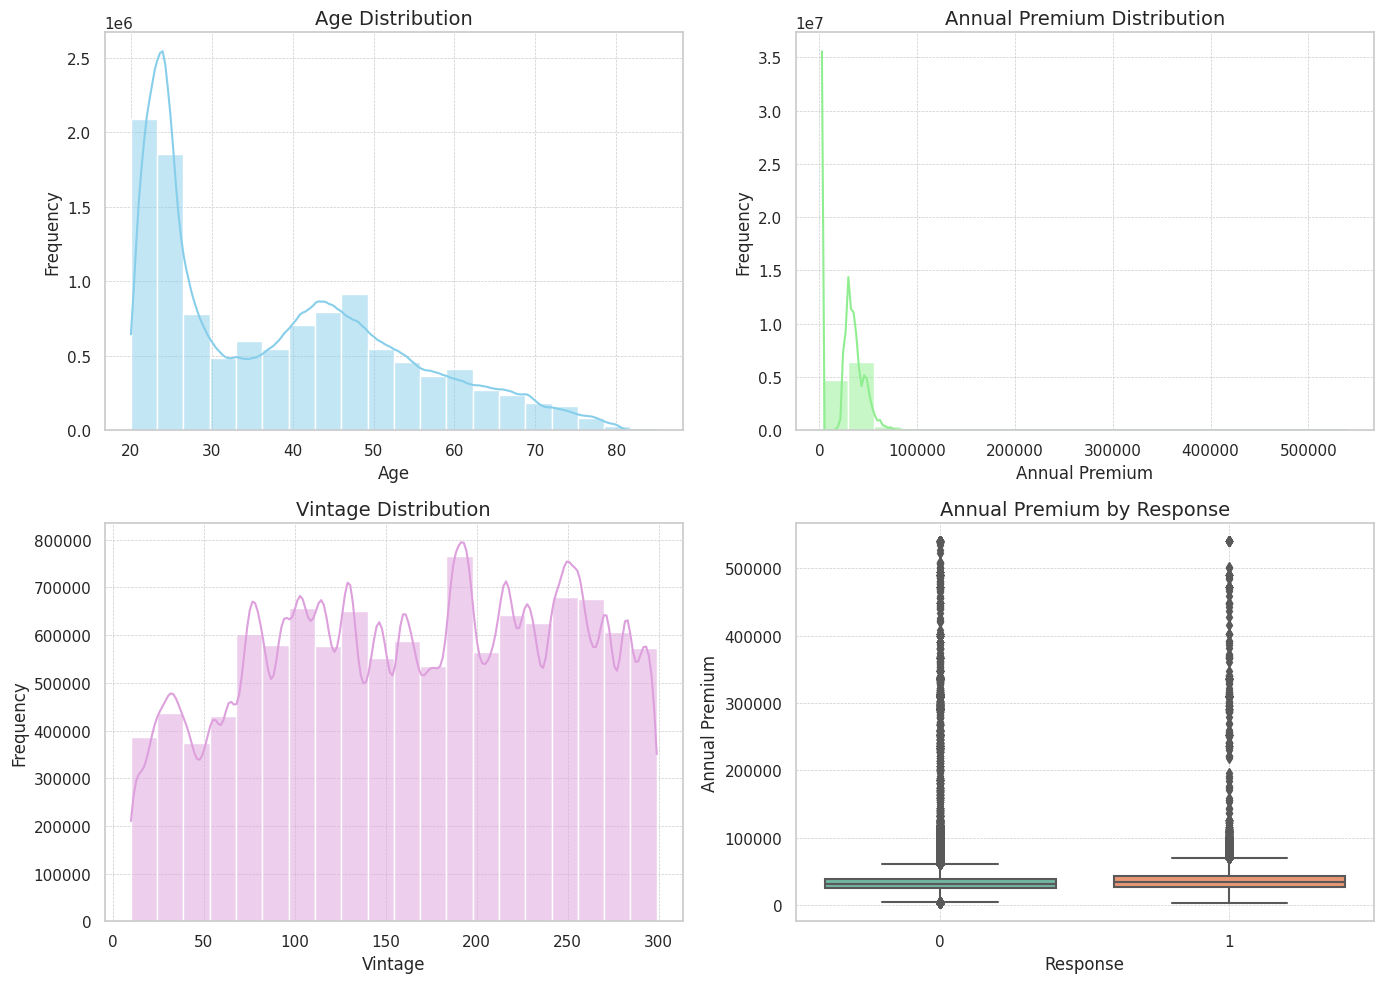

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# Subplot 1: Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df_train['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 2: Annual Premium Distribution
plt.subplot(2, 2, 2)
sns.histplot(df_train['Annual_Premium'], bins=20, kde=True, color='lightgreen')
plt.title('Annual Premium Distribution', fontsize=14)
plt.xlabel('Annual Premium', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 3: Vintage Distribution
plt.subplot(2, 2, 3)
sns.histplot(df_train['Vintage'], bins=20, kde=True, color='plum')
plt.title('Vintage Distribution', fontsize=14)
plt.xlabel('Vintage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 4: Annual Premium by Response
plt.subplot(2, 2, 4)
sns.boxplot(x='Response', y='Annual_Premium', data=df_train, palette='Set2')
plt.title('Annual Premium by Response', fontsize=14)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Annual Premium', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Adjusting the layout to prevent overlap
plt.tight_layout()
plt.show()


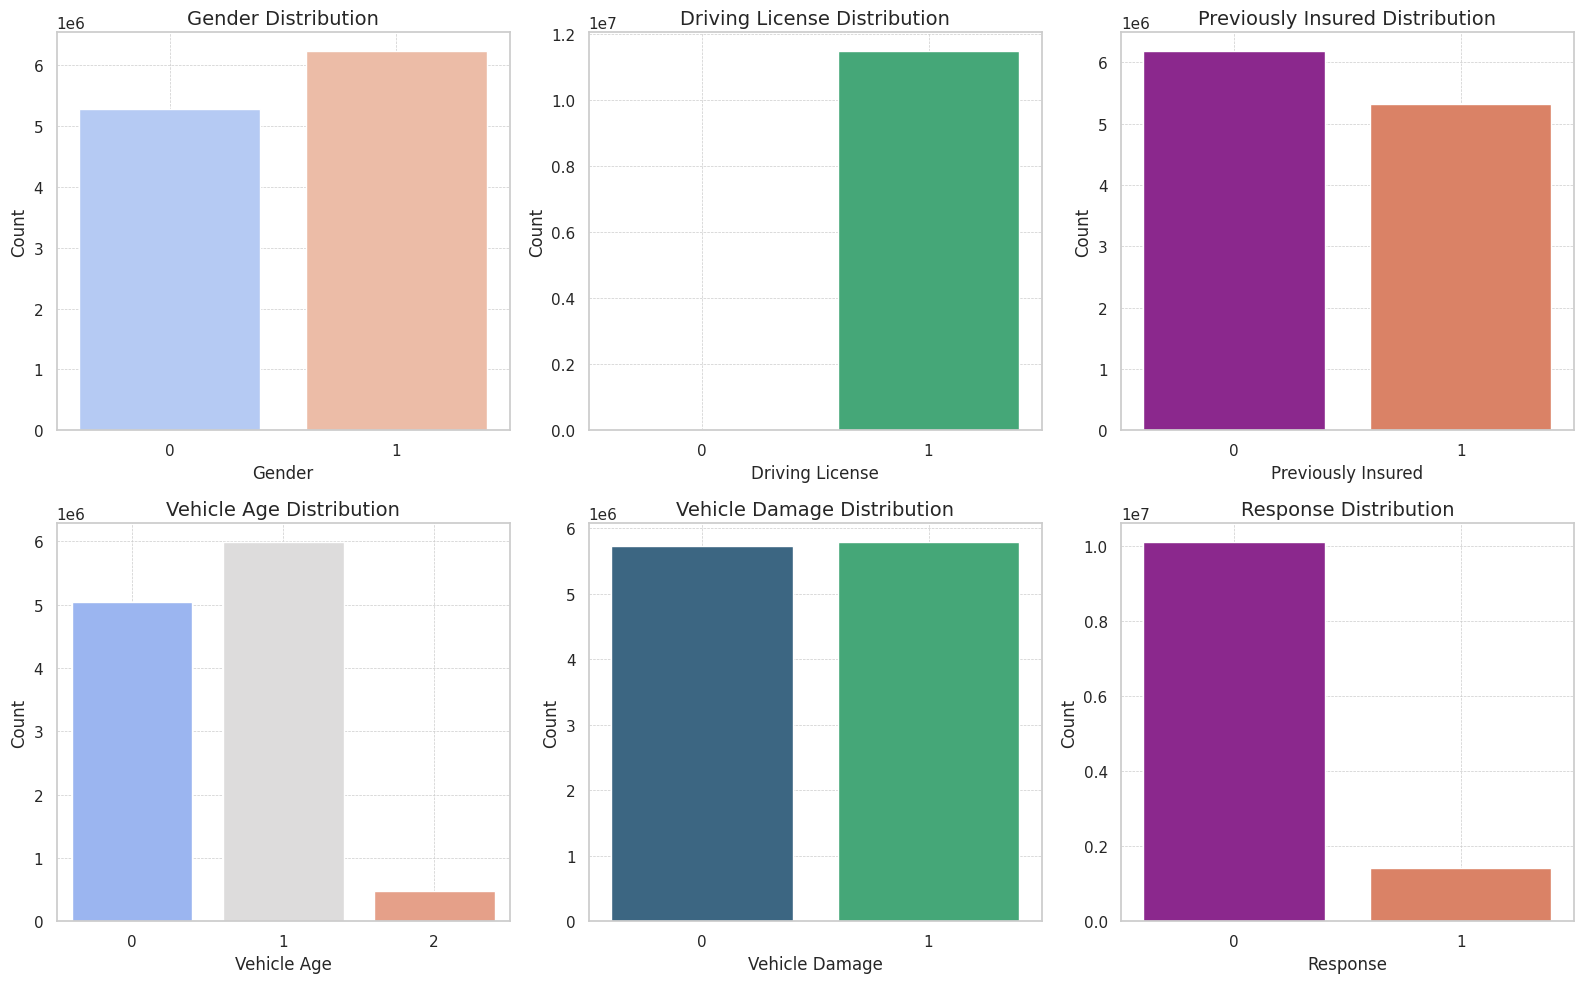

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Subplot 1: Gender Distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=df_train, palette='coolwarm')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 2: Driving License Distribution
plt.subplot(2, 3, 2)
sns.countplot(x='Driving_License', data=df_train, palette='viridis')
plt.title('Driving License Distribution', fontsize=14)
plt.xlabel('Driving License', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 3: Previously Insured Distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Previously_Insured', data=df_train, palette='plasma')
plt.title('Previously Insured Distribution', fontsize=14)
plt.xlabel('Previously Insured', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 4: Vehicle Age Distribution
plt.subplot(2, 3, 4)
sns.countplot(x='Vehicle_Age', data=df_train, palette='coolwarm')
plt.title('Vehicle Age Distribution', fontsize=14)
plt.xlabel('Vehicle Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 5: Vehicle Damage Distribution
plt.subplot(2, 3, 5)
sns.countplot(x='Vehicle_Damage', data=df_train, palette='viridis')
plt.title('Vehicle Damage Distribution', fontsize=14)
plt.xlabel('Vehicle Damage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 6: Response Distribution
plt.subplot(2, 3, 6)
sns.countplot(x='Response', data=df_train, palette='plasma')
plt.title('Response Distribution', fontsize=14)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


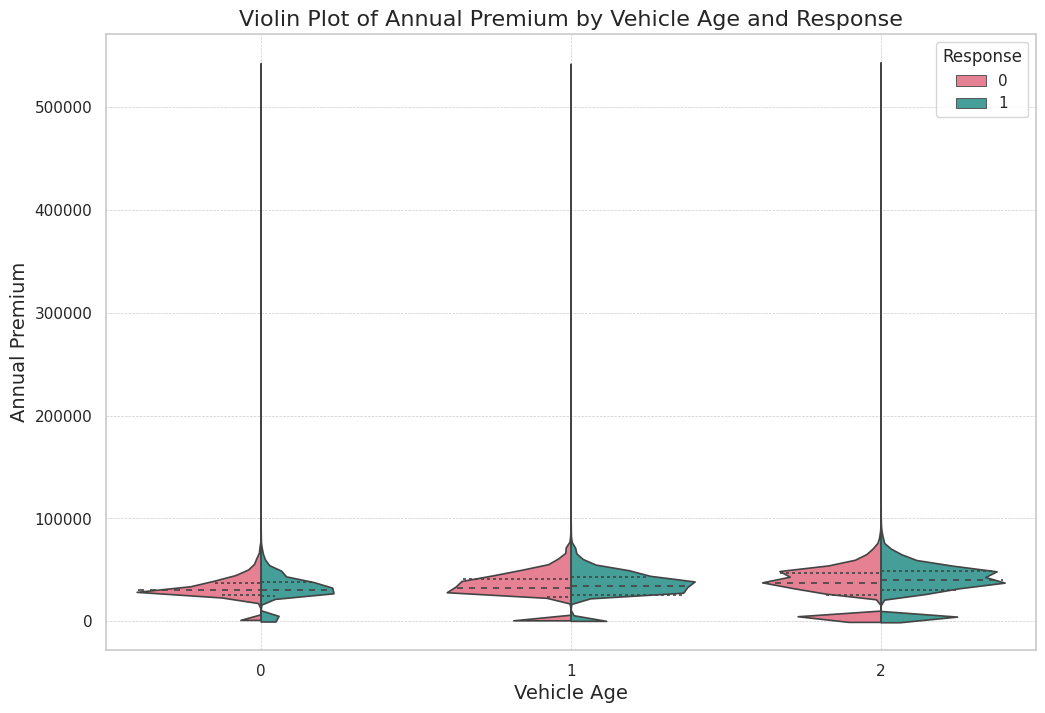

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.violinplot(x='Vehicle_Age', y='Annual_Premium', data=df_train, hue='Response', split=True,
               palette='husl', inner='quartile', linewidth=1.2)
plt.title('Violin Plot of Annual Premium by Vehicle Age and Response', fontsize=16)
plt.xlabel('Vehicle Age', fontsize=14)
plt.ylabel('Annual Premium', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


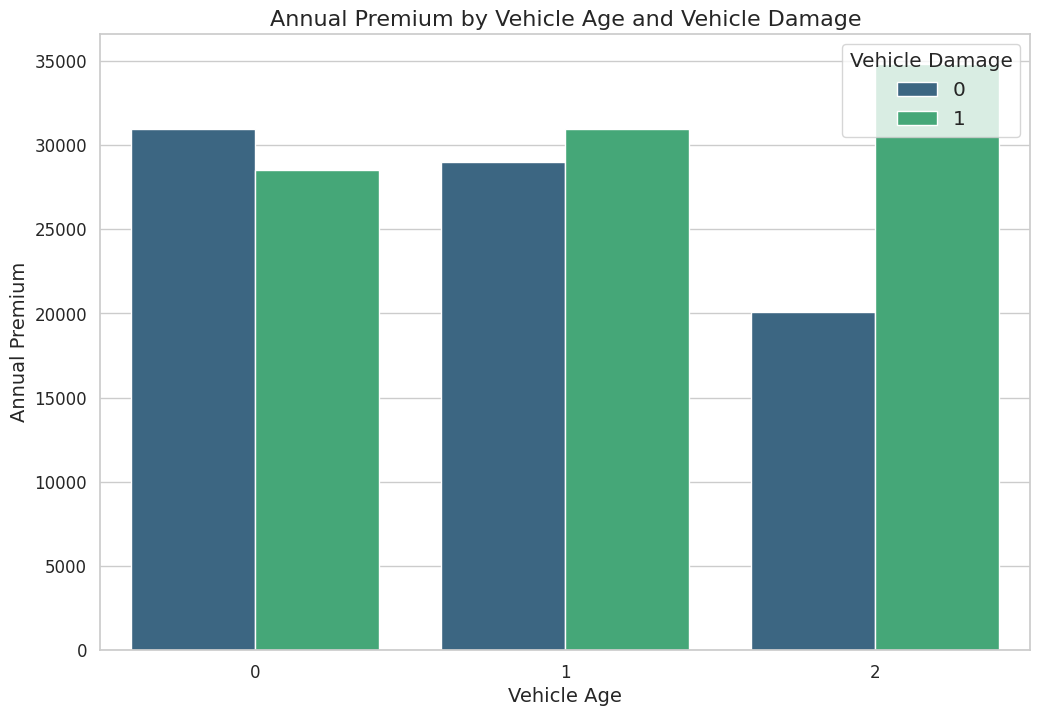

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Vehicle_Age', y='Annual_Premium', hue='Vehicle_Damage', data=df_train, palette='viridis', ci=None)
plt.title('Annual Premium by Vehicle Age and Vehicle Damage', fontsize=16)
plt.xlabel('Vehicle Age', fontsize=14)
plt.ylabel('Annual Premium', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Vehicle Damage', title_fontsize='large', fontsize='large')
plt.show()


In [34]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35,0,1,1,65101.0,124,187,0
1,1,43,1,28,0,2,1,58911.0,26,288,1
2,0,25,1,14,1,0,0,38043.0,152,254,0
3,0,35,1,1,0,1,1,2630.0,156,76,0
4,0,36,1,15,1,1,0,31951.0,152,294,0


In [35]:
def feature_engineering(df):
 
    df['Age_Vehicle_Age'] = df['Age'] * df['Vehicle_Age']
    df['Age_Previously_Insured'] = df['Age'] * df['Previously_Insured']
    df['Vehicle_Age_Damage'] = df['Vehicle_Age'] * df['Vehicle_Damage']
    df['Previously_Insured_Damage'] = df['Previously_Insured'] * df['Vehicle_Damage']   
    df['Age_squared'] = df['Age'] ** 2
    df['Vehicle_Age_squared'] = df['Vehicle_Age'] ** 2   
    df['Annual_Premium_per_Age'] = df['Annual_Premium'] / (df['Age'] + 1)
    return df


In [36]:
df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [37]:
df_train.dtypes

Gender                         int64
Age                            int64
Driving_License                int64
Region_Code                    int64
Previously_Insured             int64
Vehicle_Age                    int64
Vehicle_Damage                 int64
Annual_Premium               float64
Policy_Sales_Channel           int64
Vintage                        int64
Response                       int64
Age_Vehicle_Age                int64
Age_Previously_Insured         int64
Vehicle_Age_Damage             int64
Previously_Insured_Damage      int64
Age_squared                    int64
Vehicle_Age_squared            int64
Annual_Premium_per_Age       float64
dtype: object

In [38]:
df_train.shape

(11504798, 18)

In [39]:
df_test.shape

(7669866, 17)

In [40]:
y = df_train['Response'] 
X = df_train.drop(['Response'],axis=1)

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: cyan; padding: 20px; border-radius: 20px; border: 7px solid #2ca02c; width: 95%;">
  <span style="font-weight: bold; color: #ff7f0e; animation: pulse 2s infinite;"></span>Model Building |</span> Model Evaluation
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Training |</span> Classification

</p>

In [41]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.2, random_state =41)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Regression Analysis♒🌊</h1>  
     
</div>

In [42]:
xgb_params = {    
    'colsample_bytree': 0.48,         
    'learning_rate': 0.01567,
    'max_depth': 10, 
    'min_child_weight': 6,
    'max_bin': 3500, 
    'n_estimators': 3000,
    'eval_metric': 'auc'
    }

In [43]:
model=XGBRegressor(**xgb_params)
XGB=model.fit(train_X,train_y)
prediction=XGB.predict(test_X)

In [44]:
test_pred = XGB.predict(df_test)


In [45]:
sample_submission

,id,Response
0,11504798,0.5
1,11504799,0.5
2,11504800,0.5
3,11504801,0.5
4,11504802,0.5
...,...,...
7669861,19174659,0.5
7669862,19174660,0.5
7669863,19174661,0.5
7669864,19174662,0.5


In [46]:
sample_submission.Response= test_pred


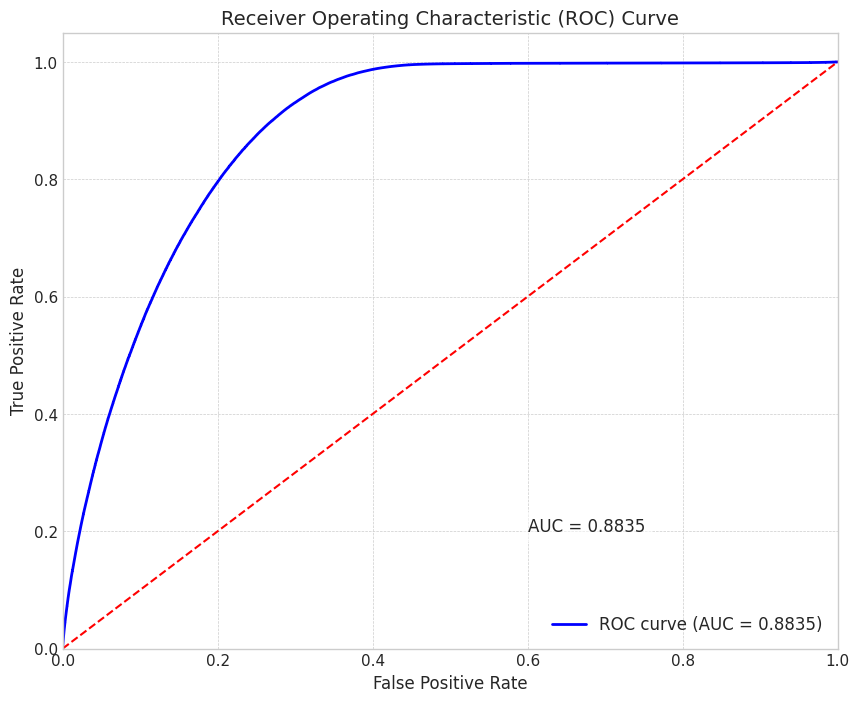

In [47]:

test_pred = XGB.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, test_pred)
auc = roc_auc_score(test_y, test_pred)

plt.figure(figsize=(10, 8))
plt.style.use('seaborn-whitegrid')
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.text(0.6, 0.2, f'AUC = {auc:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


In [49]:
sample_submission.to_csv('XGB_submission.csv', index = False)
pd.read_csv('XGB_submission.csv')

,id,Response
0,11504798,-0.010802
1,11504799,0.472721
2,11504800,0.245270
3,11504801,0.003398
4,11504802,0.118081
...,...,...
7669861,19174659,0.187156
7669862,19174660,-0.001677
7669863,19174661,0.001568
7669864,19174662,0.622429
